In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [38]:
df=pd.read_csv('gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [40]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [41]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [42]:
#Number of rows and columns
df.shape

(2290, 6)

In [43]:
#Checking the number 
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [44]:
#Getting statistical measure of data 
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [45]:
#Correlation 1.Positive Correlation 2.Negative Correlation
correlation=df.corr()


C:\Users\Aaba\AppData\Local\Temp\ipykernel_11056\453414080.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

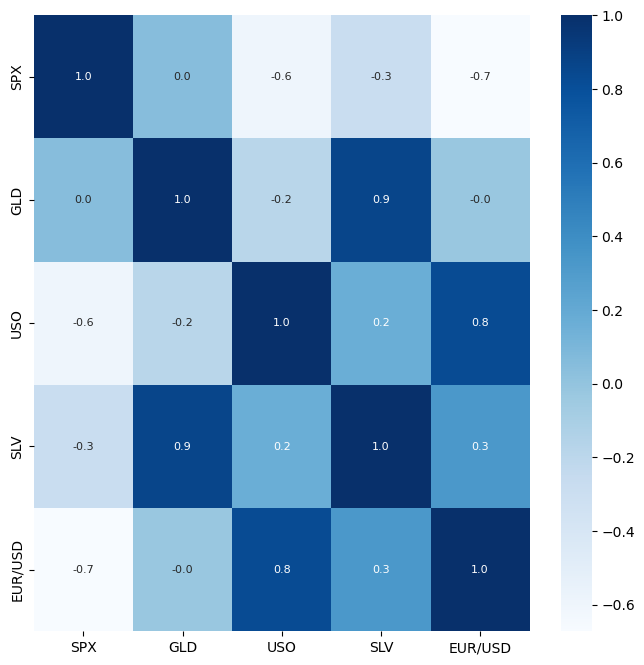

In [46]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [47]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Aaba\AppData\Local\Temp\ipykernel_11056\2389012694.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

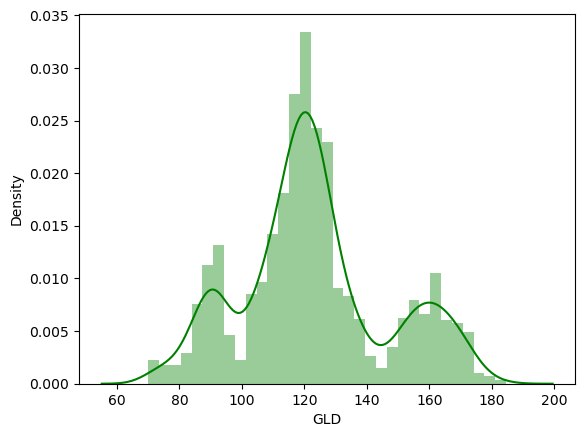

In [48]:
#checking the distribution of the GLD price
sns.distplot(df['GLD'],color='green')

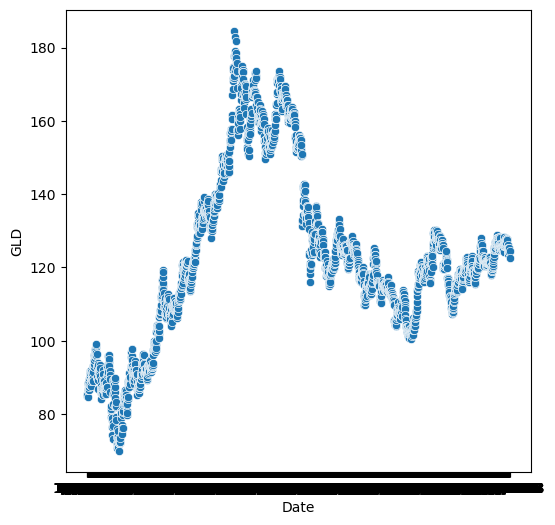

In [49]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df.Date,y=df.GLD)
plt.show()

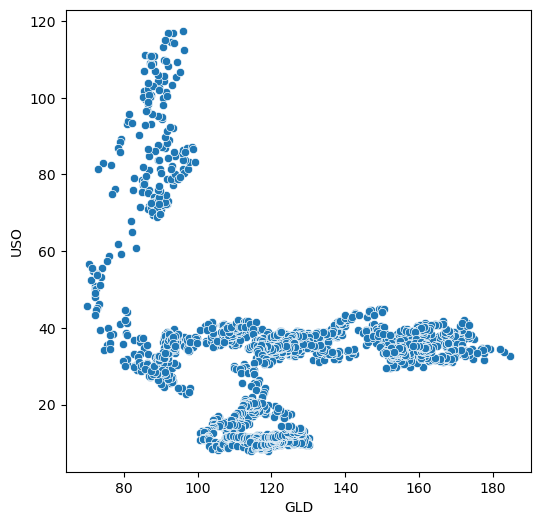

In [50]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df.GLD,y=df.USO)
plt.show()

In [51]:
#Model training
#Splitting the features and target
X=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [52]:
#feature scaling

sc=StandardScaler()
sc.fit(X_train)
X_trainsc=sc.transform(X_train)
X_testsc=sc.transform(X_test)


In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
print('Shape of X_train=',X_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of X_test=',X_test.shape)
print('Shape of y_test=',X_test.shape)

Shape of X_train= (1832, 4)
Shape of y_train= (1832,)
Shape of X_test= (458, 4)
Shape of y_test= (458, 4)


In [55]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [56]:
train_accuracy=lr.score(X_train,y_train)
print("liner regression train data accuracy is : ",train_accuracy)

liner regression train data accuracy is :  0.8771892526181604


In [57]:
test_accuracy=lr.score(X_test,y_test)
print("liner regression train data accuracy is : ",test_accuracy)

liner regression train data accuracy is :  0.8975640982991401


In [58]:
#Random Forest Regressor
regressor=RandomForestRegressor(n_estimators=100)

In [59]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [60]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[122.65289944 130.51350312 127.44899971  96.63109718 119.00120049
 114.50139936 124.80170129 117.69279908 107.90180128  98.33069955
  95.34679945 167.75819826 148.57770109 116.06500028 170.78270101
  85.17909965 122.9650986  108.82539704 113.12010071 131.55630273
 124.18679878 113.92120125 115.9431004  108.80439964 108.47860148
 125.81589934 119.30669952 112.38379914 113.28770126 125.17159914
 145.84900083  89.6003004  167.83689972 113.80999961 108.31720103
 120.13740121 141.06169862 161.4157011  174.33739789 153.0397013
 119.44790119 113.54990051 121.31469969 113.60809913 122.1761999
 107.98900092  88.65919879 114.39839945 129.70870275 117.98590098
 103.82010027 129.87780308 107.13539849 160.08680284 131.81010077
 117.81889967 146.91220042 134.96880247  95.66500122 124.61880168
 114.52839883  86.019401   104.24379923 113.76990091  84.30489939
 122.29190005 116.57029916 113.58070214 164.70070295  92.13490008
  80.40580086 161.23239999 159.23220275 106.66440019 148.79720078
 109.5581974

In [61]:
y_test

2178    122.320000
1271    129.899994
1268    126.980003
44       96.500000
2025    117.580002
           ...    
1872    126.680000
1075    167.179993
299      93.849998
306      96.230003
1132    154.339996
Name: GLD, Length: 458, dtype: float64

In [62]:
#Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train,y_train)


RandomForestRegressor()

In [63]:
score=rf.score(X_train,y_train) # train data accuracy 
score

0.9985470382345115

In [64]:
score=rf.score(X_test,y_test) # test data accracy
score

0.9905143242101547

In [65]:
#compare actual values and predicted values in a plot
y_test=list(y_test)

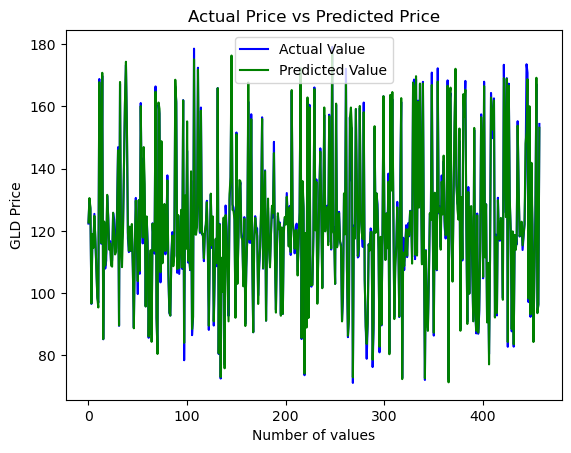

In [66]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

In [67]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)
svr_linear.score(X_test, y_test)

0.8802551309658696

In [68]:
svr_linear.score(X_train, y_train)

0.8418159378233292

In [69]:
svr_linear.fit(X_train, y_train)

SVR(kernel='linear')

In [70]:
x_pred = svr_linear.predict(X_test)

In [71]:
y_pred = svr_linear.predict(X_test)
y_pred

array([122.9826353 , 130.74650832, 128.72335405, 106.45788447,
       124.0266992 , 114.95052485, 123.78212176, 124.38314582,
       109.71926553, 105.64541285,  98.30037627, 164.82243639,
       141.898708  , 109.52433355, 169.02169379,  84.93420688,
       119.57213491, 116.85169851, 120.19817805, 131.81668346,
       120.10138908, 113.93184165, 108.79029424, 102.18430204,
       109.95855236, 121.80284495, 119.79432299, 111.54300958,
       111.128307  , 121.44257608, 212.56632004,  98.98277399,
       165.03777182, 120.84378803, 111.06222447, 123.12005755,
       135.85062324, 159.40875241, 188.41935066, 150.69568833,
       123.27760637, 119.88906052, 122.99521161, 113.94052187,
       122.74307783, 109.79634112,  89.80566808, 114.79839849,
       129.96761659, 116.96734901, 106.44448661, 130.12316759,
       106.04978377, 158.72414646, 143.07281321, 119.20903233,
       169.64627255, 129.73182506,  99.66810017, 123.36298488,
       112.04783017,  85.15372126, 110.91027263, 118.63

In [72]:
y_test

[122.32,
 129.899994,
 126.980003,
 96.5,
 117.580002,
 115.0,
 125.440002,
 116.93,
 108.220001,
 98.830002,
 96.910004,
 168.789993,
 151.029999,
 115.839996,
 169.809998,
 85.129997,
 122.639999,
 107.849998,
 110.449997,
 131.240005,
 124.940002,
 115.379997,
 116.650002,
 109.25,
 110.529999,
 125.720001,
 123.709999,
 114.949997,
 114.290001,
 126.860001,
 146.869995,
 89.440002,
 167.270004,
 115.050003,
 117.110001,
 120.620003,
 141.630005,
 160.649994,
 173.309998,
 152.300003,
 117.459999,
 113.150002,
 121.309998,
 113.470001,
 121.349998,
 107.519997,
 88.839996,
 114.440002,
 130.559998,
 117.739998,
 99.669998,
 129.770004,
 106.169998,
 161.070007,
 127.93,
 115.940002,
 143.470001,
 130.110001,
 95.730003,
 124.360001,
 116.620003,
 85.599998,
 104.099998,
 112.610001,
 86.519997,
 122.400002,
 116.470001,
 112.660004,
 166.399994,
 91.989998,
 80.809998,
 160.559998,
 157.639999,
 103.419998,
 135.020004,
 110.400002,
 124.43,
 127.739998,
 112.440002,
 119.910004,
 1

# Deployment Phase

In [117]:
input_data=(14.630005,77.309998,15.1670,1.475492)
input_data_np=np.array(input_data)
input_data_re=input_data_np.reshape(1,-1)
s_data=sc.transform(input_data_re)
pred=rf.predict(s_data)
pred

C:\Users\Aaba\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Aaba\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([79.21759897])

In [110]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [111]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64